# 1. Blurring by convolutions

### (a) Implement your own convolutional mean filter with the following sizes: 3*3, 5*5, 9*9 pixels
### (b) Apply each filter on the greyscale images provided on ILIAS.

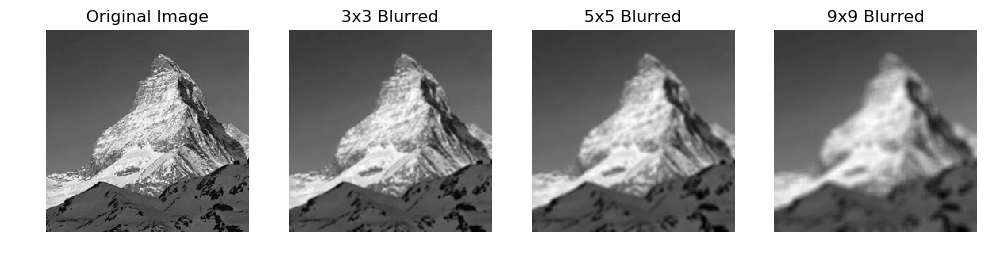

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original_image = cv2.imread("Cervin.png", cv2.IMREAD_GRAYSCALE)

# Define kernel sizes for 3x3, 5x5, and 9x9 mean filters
kernel_sizes = [3, 5, 9]
blurred_images = []


plt.figure(figsize=(12, 4))


plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

for i, size in enumerate(kernel_sizes):
    kernel = np.ones((size, size), dtype=np.float32) / (size * size)


    blurred_image = cv2.filter2D(original_image, -1, kernel)


    blurred_image_filename = f"blurred_{size}x{size}.png"
    cv2.imwrite(blurred_image_filename, blurred_image)
    blurred_images.append(blurred_image_filename)


    plt.subplot(1, 4, i + 2)
    plt.title(f"{size}x{size} Blurred")
    plt.imshow(blurred_image, cmap='gray')
    plt.axis('off')


plt.show()


## (c) Comment on the results obtained with the different filter sizes.

The observation is that the choice of filter size determines the amount of blurring or smoothing applied to the original image. Smaller filter sizes retains more details and sharpness, but larger filter sizes create a stronger blurring effect, sacrificing fine details for a smoother appearance. 

# 2. Edge detection

### (a) Implement your own Laplacian of Gaussian filter (example provided in the lecture). 
### (b) Implement your own gradient filters for edge detection (examples for vertical and horizontal filters provided in the lecture). 
### (c) Apply both edge detection methods to the greyscale images provided on ILIAS.


In [10]:

image = cv2.imread("Cervin.png", cv2.IMREAD_GRAYSCALE)

# Laplacian of Gaussian (LoG) filter
log_kernel = np.array([[0, 0, -1, 0, 0],
                      [0, -1, -2, -1, 0],
                      [-1, -2, 16, -2, -1],
                      [0, -1, -2, -1, 0],
                      [0, 0, -1, 0, 0]], dtype=np.float32)
log_result = cv2.filter2D(image, -1, log_kernel)


# custom horizontal gradient kernel
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]], dtype=np.float32)

# custom vertical gradient kernel
sobel_y_kernel = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]], dtype=np.float32)

# Convolve
sobel_x = cv2.filter2D(image, -1, sobel_x_kernel)
sobel_y = cv2.filter2D(image, -1, sobel_y_kernel)


# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Convert gradient_magnitude to 8-bit integer
gradient_magnitude = (gradient_magnitude * 255 / gradient_magnitude.max()).astype(np.uint8)

cv2.imwrite("CustomGradientX_edge_detection.png", sobel_x)
cv2.imwrite("CustomGradientY_edge_detection.png", sobel_y)
cv2.imwrite("CustomGradientMagnitude.png", gradient_magnitude)


True

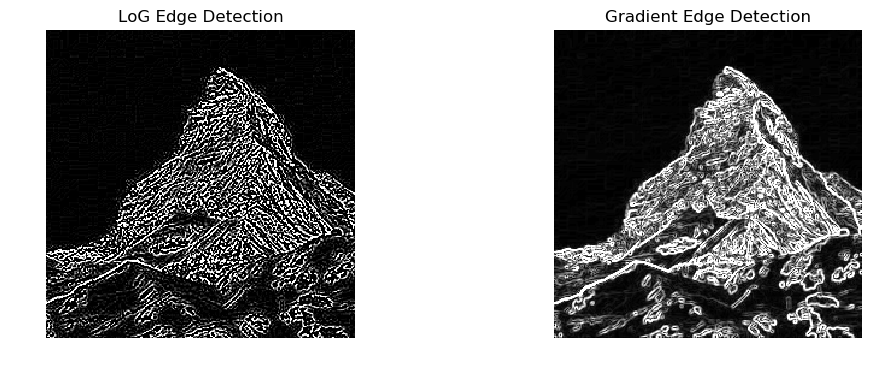

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the saved images
log_result = cv2.imread("LoG_edge_detection.png", cv2.IMREAD_GRAYSCALE)
gradient_magnitude = cv2.imread("Gradient_edge_detection.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("LoG Edge Detection")
plt.imshow(log_result, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gradient Edge Detection")
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')
plt.show()

### (d) Comment on the results obtained with the two methods

The LoG filter highlights fine edges and details, the Sobel filters provide a gradient-based approach and are particularly good at capturing edges where gradient changes drastically especially in horizontal and vertical directions

# 3. Statistical filters

## (a) Implement your own minimum and maximum filters, with size 3*3 and 5*5 pixels.
## (b) Apply both filters to the greyscale images provided on ILIAS, as well as their combination (max - min).


For each pixel in the input image, the min_filter function defines a local neighborhood centered around that pixel, with the size determined by the kernel_size. The maximum pixel value becomes the new value for the corresponding pixel in the output image in case of max_filter. (minimum pixel value in case of min_filter)

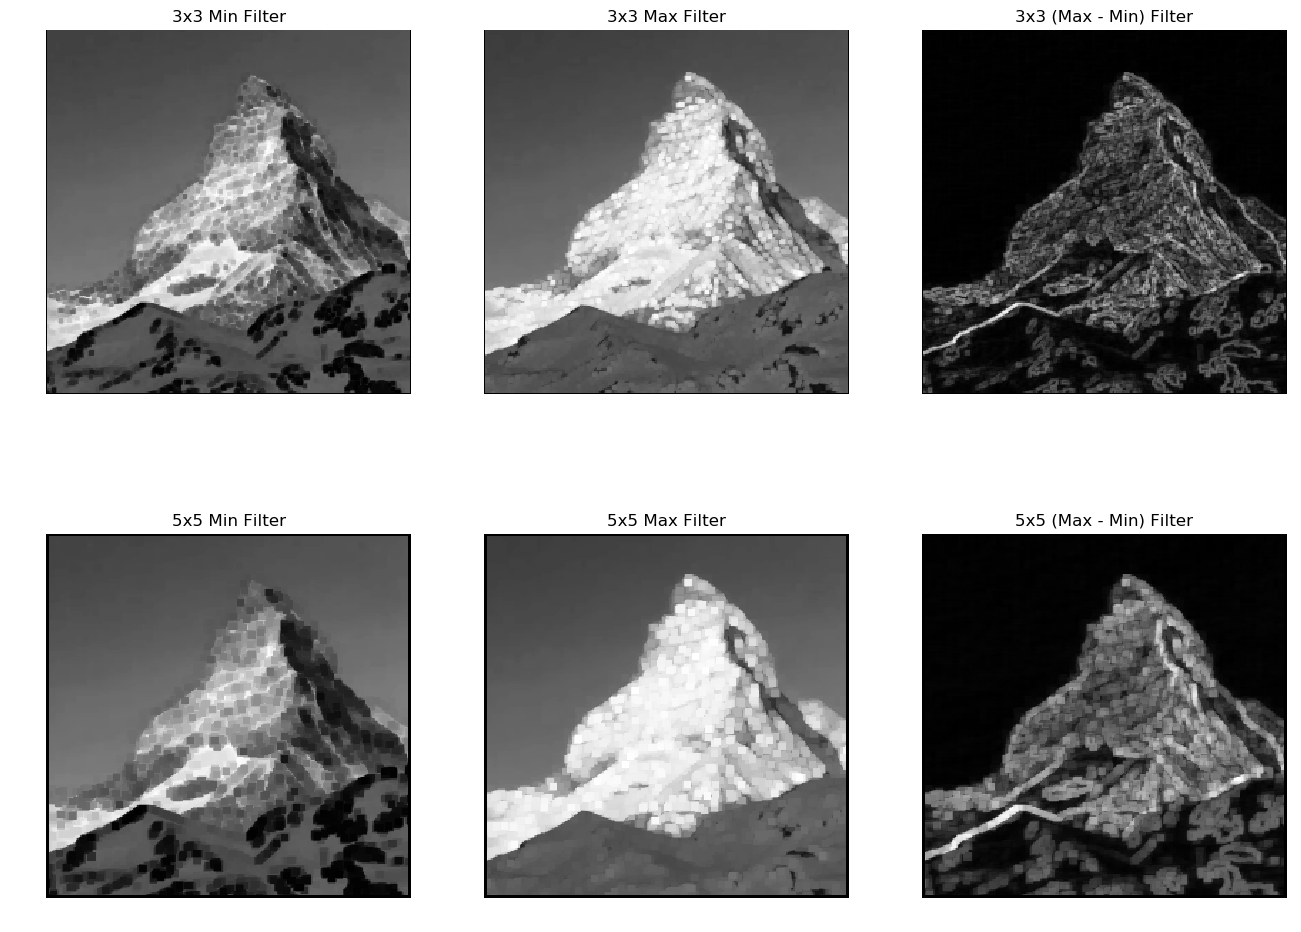

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("Cervin.png", cv2.IMREAD_GRAYSCALE)

kernel_sizes = [3, 5]

def min_filter(image, kernel_size):
    h, w = image.shape
    result = np.zeros((h, w), dtype=np.uint8)
    k_half = kernel_size // 2
    for i in range(k_half, h - k_half):
        for j in range(k_half, w - k_half):
            result[i, j] = np.min(image[i - k_half:i + k_half + 1, j - k_half:j + k_half + 1])
    return result

def max_filter(image, kernel_size):
    h, w = image.shape
    result = np.zeros((h, w), dtype=np.uint8)
    k_half = kernel_size // 2
    for i in range(k_half, h - k_half):
        for j in range(k_half, w - k_half):
            result[i, j] = np.max(image[i - k_half:i + k_half + 1, j - k_half:j + k_half + 1])
    return result

plt.figure(figsize=(16, 12))

for i, size in enumerate(kernel_sizes):
    min_filtered = min_filter(image, size)
    max_filtered = max_filter(image, size)
    max_min_diff = max_filtered - min_filtered
    
    plt.subplot(2, 3, i*3 + 1)
    plt.title(f"{size}x{size} Min Filter")
    plt.imshow(min_filtered, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, i*3 + 2)
    plt.title(f"{size}x{size} Max Filter")
    plt.imshow(max_filtered, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, i*3 + 3)
    plt.title(f"{size}x{size} (Max - Min) Filter")
    plt.imshow(max_min_diff, cmap='gray')
    plt.axis('off')

    cv2.imwrite(f"{size}x{size}_min_filter.png", min_filtered)
    cv2.imwrite(f"{size}x{size}_max_filter.png", max_filtered)
    cv2.imwrite(f"{size}x{size}_max_min_diff.png", max_min_diff)

plt.show()


## (c) Comment on the results obtained with the individual filters and their combination.

The minimum filter darkens the image and removes smaller details, while the maximum filter brightens the image and fills in darker regions. The (Max - Min) filter highlights the edges